# 18-3 Calculus with sympy

## Limits: `limit`

General syntax: `limit(e, z, z0, dir='+')`


In [27]:
x = Symbol('x')
limit(sin(pi*x)/pi/x , x, 0)

1

### Warning: 
The default value of `dir` is `'+'`, which may lead to some issues if the right limit exists but the limit does not. Take for instance $f(x) = \frac{x}{|x|}$. We have that $\lim_{x \to 0-} f(x) = -1$ and $\lim_{x \to 0+} f(x) = 1$ so that $\lim_{x \to 0} f(x)$ does not exist, but

In [31]:
expr = x/abs(x)
limit(expr,x,0) # same as limit(expr,x,0, '+')

1

In [32]:
limit(expr,x,0,'-')

-1

If we are more careful and ask for sympy to check that teh left and right limits exist and are equal, we get an error:

In [33]:
limit(expr,x,0,'+-')

ValueError: The limit does not exist since left hand limit = -1 and right hand limit = 1

### Limits at infinity:
sympy uses `+oo` and `-oo` respectively to represent $+\infty$ and $-\infty$

In [34]:
limit(sin(pi*x)/pi/x, x, +oo)

0

## Derivatives: `diff`

In [4]:
x = Symbol('x')
expr = x*ln(x)
expr

x*log(x)

In [9]:
derivative = diff(expr,x)
# because expr depends only on x, this can be abbreviated as diff(expr)
derivative

log(x) + 1

In [11]:
# second derivative
diff(diff(expr,x),x)

1/x

In [14]:
# Alternative syntax:
diff(expr,x,x)
# or diff(expr,x,2)

1/x

## Partial derivatives:
Explicitely specifying which variable is the derivative computed means that sympy computes *partial derivatives* when expressions include multiple symbols: 

In [36]:
(a,b,c) = symbols( ('a','b','c') )
poly2 = a*x**2+b*x+c
diff(poly2,x)

2*a*x + b

In [51]:
x,y = symbols( ('x','y') )
expr_xy = 1 / (x**2 + y**2)
simplify(diff(expr_xy,x,2))

2*(3*x**2 - y**2)/(x**2 + y**2)**3

In [56]:
diff(expr_xy,x,y)

8*x*y/(x**2 + y**2)**3

Example: a Gaussian function in dimension 2

In [103]:
(sigma) = symbols( ('sigma') )
G = 1/sqrt(2*pi)/sigma**2 * exp(-(x**2+y**2)/2/sigma**2)
G


sqrt(2)*exp((-x**2/2 - y**2/2)/sigma**2)/(2*sqrt(pi)*sigma**2)

In [104]:
simplify(diff(G,x,x) + diff(G,y,y))

sqrt(2)*(-2*sigma**2 + x**2 + y**2)*exp(-(x**2 + y**2)/(2*sigma**2))/(2*sqrt(pi)*sigma**6)

In [105]:
gradG = Matrix([diff(G,x), diff(G,y)])
gradG

Matrix([
[-sqrt(2)*x*exp((-x**2/2 - y**2/2)/sigma**2)/(2*sqrt(pi)*sigma**4)],
[-sqrt(2)*y*exp((-x**2/2 - y**2/2)/sigma**2)/(2*sqrt(pi)*sigma**4)]])

In [112]:
X = solve(gradG, [x,y])
X

[(0, 0)]

In [83]:
H = Matrix([[diff(G,x,x), diff(G,x,y)], [diff(G,y,x), diff(G,y,y)]])
H

Matrix([
[-sqrt(2)/(2*sqrt(pi)*sigma**4),                              0],
[                             0, -sqrt(2)/(2*sqrt(pi)*sigma**4)]])

In [113]:
H0 = H.subs( [(x,0),(y,0)] )
H0

Matrix([
[-sqrt(2)/(2*sqrt(pi)*sigma**4),                              0],
[                             0, -sqrt(2)/(2*sqrt(pi)*sigma**4)]])

In [114]:
simplify(H0.det())

1/(2*pi*sigma**8)

## integrals, antiderivatives

* indefinite integral: `integrate(f, variable)`
* definite integral: `integrate(f, (variable,a,b))`

In [123]:
gauss1D = -exp(-x/2)/2
integrate(gauss1D,x)

exp(-x/2)

In [124]:
integrate(log(x), x)

x*log(x) - x

In [130]:
expr = integrate(exp(-x), (x,0,oo))
expr

1


## An optimization problem:
Let $a$, and $b$  be two unknown parameters, and let $$f(x) = \frac{24 x \left(a - 4 x\right) + \left(2 a - 16 x\right) \left(b - 4 x\right)}{\left(b - 4 x\right)^{4}}.$$
1. Find $a$ and $b>0$ such that $\frac{\mathrm{d}f}{\mathrm{d}x}(0,y) = 0$ and $\frac{\mathrm{d}^2f}{\mathrm{d}x^2}(0,y) = -1$
2. For these values of $a$ and $b$, compute
   - $\lim_{x \to 0} f(x)$
   - $\lim_{x \to oo} f(x)$
   - $\int f(x)\, dx$
   - $\int_1^\infty f(x)\, dx$.

In [253]:
x = Symbol("x")
a = Symbol("a", Real = True)
b = Symbol("b", Positive=True)
f = (24 * x * (a - 4 * x) + 2 * (a - 8 * x) * (b - 4 * x)) / ((b - 4 * x) ** 4)
f

(24*x*(a - 4*x) + (2*a - 16*x)*(b - 4*x))/(b - 4*x)**4

In [254]:
fx = diff(f,x)
fx

(16*a - 16*b - 64*x)/(b - 4*x)**4 + 16*(24*x*(a - 4*x) + (2*a - 16*x)*(b - 4*x))/(b - 4*x)**5

In [255]:
fxx = diff(f,x,x)
fxx

64*(-1 - 8*(-a + b + 4*x)/(b - 4*x) + 10*(12*x*(a - 4*x) + (a - 8*x)*(b - 4*x))/(b - 4*x)**2)/(b - 4*x)**4

In [256]:
Eq1 = Eq(fx.subs({x:0}), 0)
Eq2 = Eq(fxx.subs({x:0}), -1)

In [257]:
solve([Eq1, Eq2], (a,b))

[(-2*sqrt(2)*3**(1/4)/3, -2*sqrt(2)*3**(1/4)),
 (2*sqrt(2)*3**(1/4)/3, 2*sqrt(2)*3**(1/4)),
 (-2*sqrt(2)*3**(1/4)*I/3, -2*sqrt(2)*3**(1/4)*I),
 (2*sqrt(2)*3**(1/4)*I/3, 2*sqrt(2)*3**(1/4)*I)]

In [258]:
astar = '2*sqrt(2)*3**(1/4)/3'
bstar = '2*sqrt(2)*3**(1/4)'
fab = f.subs( {a:astar, b:bstar})
fab

(24*x*(-4*x + 2*sqrt(2)*3**(1/4)/3) + (-16*x + 4*sqrt(2)*3**(1/4)/3)*(-4*x + 2*sqrt(2)*3**(1/4)))/(-4*x + 2*sqrt(2)*3**(1/4))**4

In [279]:
limit(fab,x,0)

sqrt(3)/36

In [260]:
limit(fab,x,oo)

0

In [261]:
integrate(fab,x)

-(-24*x**2 + 4*sqrt(2)*3**(1/4)*x)/(192*x**3 - 288*sqrt(2)*3**(1/4)*x**2 + 288*sqrt(3)*x - 48*sqrt(2)*3**(3/4))

In [268]:
print(solveset(fab))

{-sqrt(14)*3**(1/4)/6 - sqrt(2)*3**(1/4)/3, -sqrt(2)*3**(1/4)/3 + sqrt(14)*3**(1/4)/6}


In [269]:
xstar = '-sqrt(2)*3**(1/4)/3 + sqrt(14)*3**(1/4)/6'

In [270]:
I = integrate(fab,(x,0,xstar))
I

-(-24*(-sqrt(2)*3**(1/4)/3 + sqrt(14)*3**(1/4)/6)**2 + 4*sqrt(2)*3**(1/4)*(-sqrt(2)*3**(1/4)/3 + sqrt(14)*3**(1/4)/6))/(-48*sqrt(2)*3**(3/4) - 288*sqrt(2)*3**(1/4)*(-sqrt(2)*3**(1/4)/3 + sqrt(14)*3**(1/4)/6)**2 + 192*(-sqrt(2)*3**(1/4)/3 + sqrt(14)*3**(1/4)/6)**3 + 288*sqrt(3)*(-sqrt(2)*3**(1/4)/3 + sqrt(14)*3**(1/4)/6))

In [276]:
Isimp = factor(simplify(I))
Isimp

3**(3/4)*(-10*sqrt(2) + 7*sqrt(14))/3888

In [277]:
Isimp.evalf()

0.00706451722487164

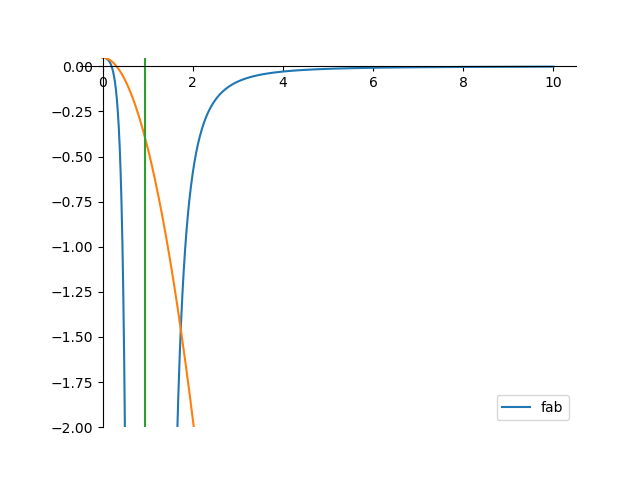

In [241]:
fnp = lambdify(x,fab)
fig, ax = plt.subplots()
X = np.linspace(0,10,1001)

(ymin,ymax) = (-2,fnp(0))
ax.plot(X,fnp(X),label = 'fab')
ax.set_ylim(ymin,ymax)
ax.spines[['left', 'bottom']].set_position('zero')
ax.spines[['top', 'right']].set_visible(False)
ax.plot(X,fnp(0)-X**2/2)
plt.plot((np.sqrt(2)*3**(1/4)/2, np.sqrt(2)*3**(1/4)/2),(ymin,ymax))
ax.legend()
